# Plots of the loss and the accuracy

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Loss and Accuracy values after ten epochs

In [4]:
def load_data(model_path):
    with open(model_path, 'rb') as f:
        results = torch.load(f)
        losses = [tensor.item() for tensor in results['losses']]
        accuracies = results['accuracies']

    return losses, accuracies

def running_average(window_size, data):
    average_data = []
    for ind in range(len(data) - window_size + 1):
        average_data.append(np.mean(data[ind:ind+window_size]))
    for ind in range(window_size - 1):
        average_data.insert(0, np.nan)
    return average_data

In [5]:
losses_4, accuracies_4 = load_data('./symbol_model_4.tar')
losses_10, accuracies_10 = load_data('./symbol_model_10.tar')

average_loss_4 = running_average(25, losses_4)
average_loss_10 = running_average(25, losses_10)

average_accuracy_4 = running_average(25, accuracies_4)
average_accuracy_10 = running_average(25, accuracies_10)

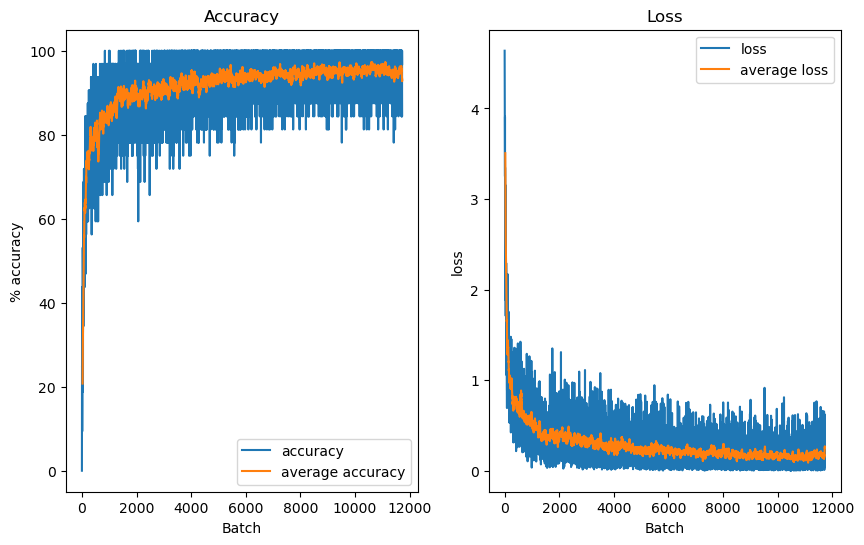

In [6]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(accuracies_10, label='accuracy')
plt.plot(average_accuracy_10, label='average accuracy')
plt.ylabel('% accuracy')
plt.xlabel('Batch')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(losses_10, label='loss')
plt.plot(average_loss_10, label='average loss')
plt.ylabel('loss')
plt.xlabel('Batch')
plt.legend();

In [7]:
print('4 Epoch Model')
print('  Mean training accuracy:\t', np.mean(accuracies_4))
print('  Mean training loss:\t\t', np.mean(losses_4))

print('\n10 Epoch Model')
print('  Mean training accuracy:\t', np.mean(accuracies_10))
print('  Mean training loss:\t\t', np.mean(losses_10))

4 Epoch Model
  Mean training accuracy:	 88.52035379369138
  Mean training loss:		 0.4160144666490881

10 Epoch Model
  Mean training accuracy:	 91.71621909633419
  Mean training loss:		 0.29570500332456623
